In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('/content/titanic.csv')

sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:

print("Shape (rows, columns):", df.shape)


print("\nColumns:")
print(df.columns.tolist())


print("\nDataset info:")
df.info()


print("\nSummary statistics:")
df.describe().T


Shape (rows, columns): (891, 12)

Columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:

print("Missing values per column:")
print(df.isnull().sum())


print("\nMissing percentage per column:")
print((df.isnull().mean() * 100).round(2))


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing percentage per column:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


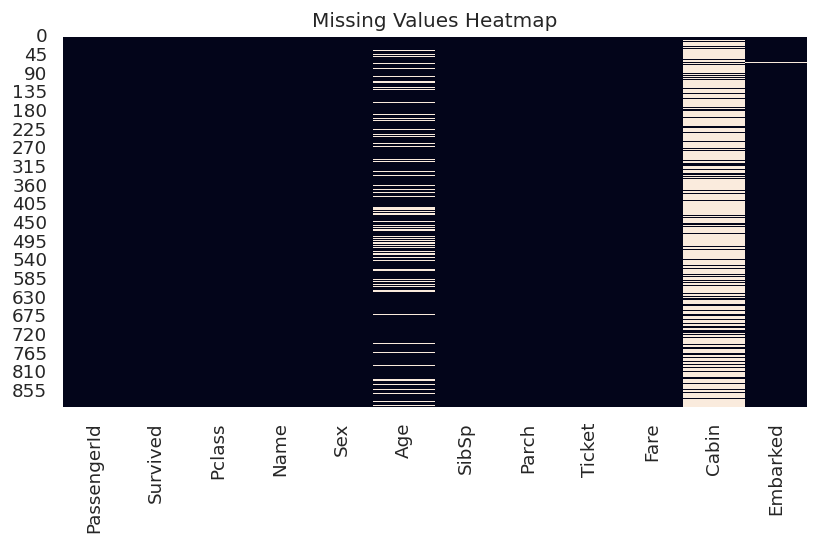

In [22]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


os.makedirs('outputs/figures', exist_ok=True)

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')

plt.savefig('outputs/figures/missing_values_heatmap.png', bbox_inches='tight')

plt.show()



In [12]:

df_clean = df.copy()


df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())


df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])


df_clean['Fare'] = df_clean['Fare'].fillna(df_clean['Fare'].median())


df_clean = df_clean.drop_duplicates()

print(" Cleaning Done!")
df_clean.isnull().sum()


 Cleaning Done!


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


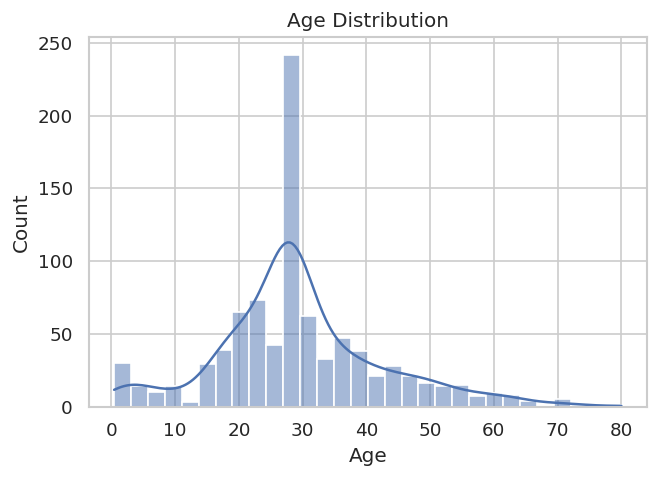

In [23]:

os.makedirs('outputs/figures', exist_ok=True)

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df_clean['Age'], kde=True)
plt.title('Age Distribution')
plt.savefig('outputs/figures/age_distribution.png', bbox_inches='tight')
plt.show()


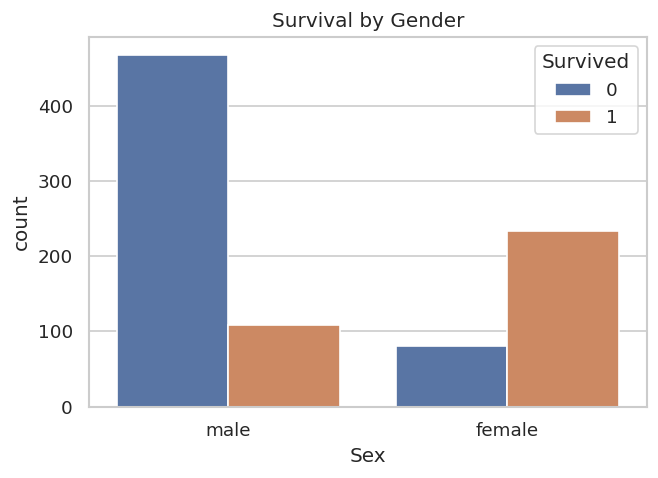

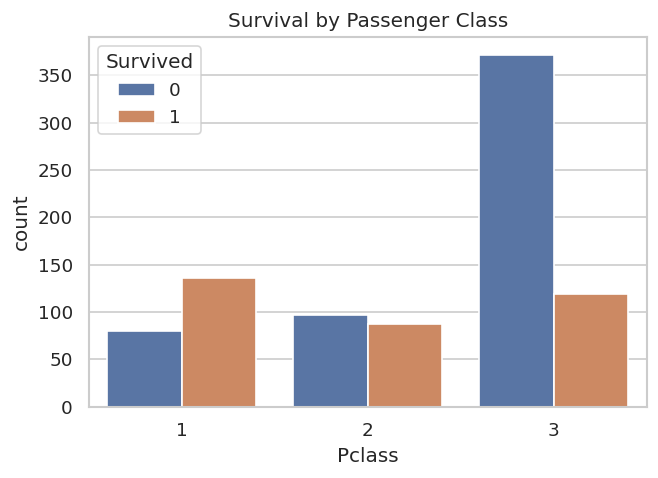

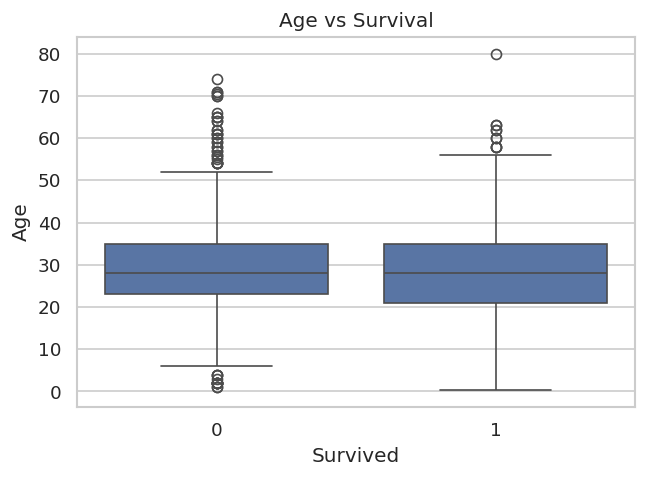

In [24]:


#  Survival by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df_clean)
plt.title('Survival by Gender')
plt.savefig('outputs/figures/survival_by_gender.png', bbox_inches='tight')
plt.show()

#  Survival by passenger class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df_clean)
plt.title('Survival by Passenger Class')
plt.savefig('outputs/figures/survival_by_pclass.png', bbox_inches='tight')
plt.show()

#  Age vs survival (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df_clean)
plt.title('Age vs Survival')
plt.savefig('outputs/figures/age_vs_survival.png', bbox_inches='tight')
plt.show()


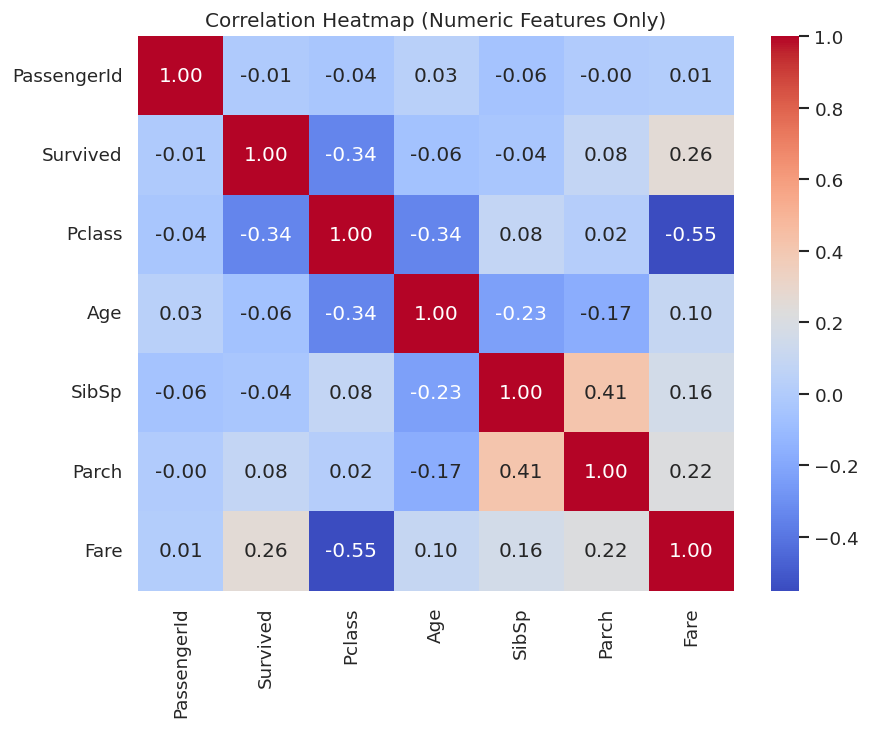

In [26]:


# select only numeric columns
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# correlation matrix
corr_matrix = numeric_df.corr()

# heatmap plotting
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')


plt.savefig('outputs/figures/correlation_heatmap.png', bbox_inches='tight')

plt.show()



In [18]:
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square test: Pclass vs Survived
table = pd.crosstab(df_clean['Pclass'], df_clean['Survived'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square test (Pclass vs Survived)")
print("p-value =", round(p, 4))
if p < 0.05:
    print(" There is a significant relationship between Pclass and Survival.")
else:
    print(" No significant relationship found.")

#  T-test: Age difference between survived and not survived
group_survived = df_clean[df_clean['Survived'] == 1]['Age'].dropna()
group_not_survived = df_clean[df_clean['Survived'] == 0]['Age'].dropna()

t_stat, p_value = ttest_ind(group_survived, group_not_survived, equal_var=False)
print("\nT-test (Age vs Survival)")
print("p-value =", round(p_value, 4))
if p_value < 0.05:
    print(" Age difference is statistically significant.")
else:
    print(" No significant age difference found.")


Chi-square test (Pclass vs Survived)
p-value = 0.0
 There is a significant relationship between Pclass and Survival.

T-test (Age vs Survival)
p-value = 0.0583
 No significant age difference found.


In [19]:
import os


os.makedirs('outputs', exist_ok=True)


df_clean.to_csv('/content/outputs/titanic_cleaned.csv', index=False)

print(" Cleaned dataset saved to: /content/outputs/titanic_cleaned.csv")


 Cleaned dataset saved to: /content/outputs/titanic_cleaned.csv


In [20]:
!ls /content/outputs


titanic_cleaned.csv
